In [15]:
import pandas as pd

def read_data(file_path):
    return pd.read_csv(file_path)

In [16]:
category_data = read_data('/Users/macbook/thesis/new/code/data/processed_data/category_df2.csv')
feature_data = read_data('/Users/macbook/thesis/new/code/data/processed_data/topics_sentiment.csv')

In [17]:
print("Datatypes in category_data:")
print(category_data.dtypes)

print("\nDatatypes in feature_data:")
print(feature_data.dtypes)

Datatypes in category_data:
tool_id     float64
category    float64
dtype: object

Datatypes in feature_data:
tool_id                       float64
collaboration_sent            float64
innovative_sent               float64
information_sent              float64
service_sent                  float64
business_development_sent     float64
content_management_sent       float64
user_experience_sent          float64
design_sent                   float64
time_management_sent          float64
product_sent                  float64
content_creation_sent         float64
customer_support_sent         float64
ease_of_use_sent              float64
workflow_optimization_sent    float64
ai_assistant_sent             float64
collaboration                 float64
innovative                    float64
information                   float64
service                       float64
business_development          float64
content_management            float64
user_experience               float64
design          

In [18]:
categories = [
    (0, '3D Digital Replicas', 'Outputs 3D digital models or simulations of real-world objects.'),
    (1, 'Processed Data', 'Outputs datasets.'),
    (2, 'Streamlined Processes', 'Offers automated sequences or optimized workflows as a result of process management tools.'),
    (3, 'Generated Text', 'Produces written content, including edited, analyzed, or synthesized text documents.'),
    (4, 'Multimodal', 'Creates content that integrates multiple outputs.'),
    (5, 'Software Solutions', 'Generates code, software patches, testing results, or programming-related documents.'),
    (6, 'Analytical Insights', 'Delivers insights or predictions based on data analysis.'),
    (7, 'Audio Files', 'Produces sound recordings, edited audio clips, or synthesized speech outputs.'),
    (8, 'Video Content', 'Generates edited video sequences, visual effects, or complete video productions.'),
    (9, 'Enhanced Images', 'Enhances, alters, or creates digital images and graphics.'),
    (10, 'Operational Outputs', 'Provides network configurations, management plans, or support-related documentation.')
]

In [19]:
df = pd.DataFrame(categories, columns=['category_id', 'category_name', 'description'])

In [20]:
# Zorg ervoor dat de Category ID een float is
df['category_id'] = df['category_id'].astype(float)

In [21]:
merged_df = pd.merge(category_data, df, left_on='category', right_on='category_id', how='left')

In [22]:
merged_df.head()

,tool_id,category,category_id,category_name,description
0,8867.0,NaN,NaN,NaN,NaN
1,5058.0,NaN,NaN,NaN,NaN
2,1471.0,NaN,NaN,NaN,NaN
3,3328.0,9.0,9.0,Enhanced Images,"Enhances, alters, or creates digital images an..."
4,7978.0,NaN,NaN,NaN,NaN


In [12]:
merged_df.columns

Index(['tool_id', 'category', 'category_id', 'category_name', 'description'], dtype='object')

In [26]:
merged_df.dtypes

#cahnge categoryname to string
#merged_df['category_name'] = merged_df['category_name'].astype(str, errors = 'ignore')

#change description to string
merged_df['description'] = merged_df['description'].astype(str, errors = 'ignore')

#delete nan values
merged_df = merged_df.dropna()

merged_df.dtypes

tool_id          float64
category         float64
category_id      float64
category_name     object
description       object
dtype: object

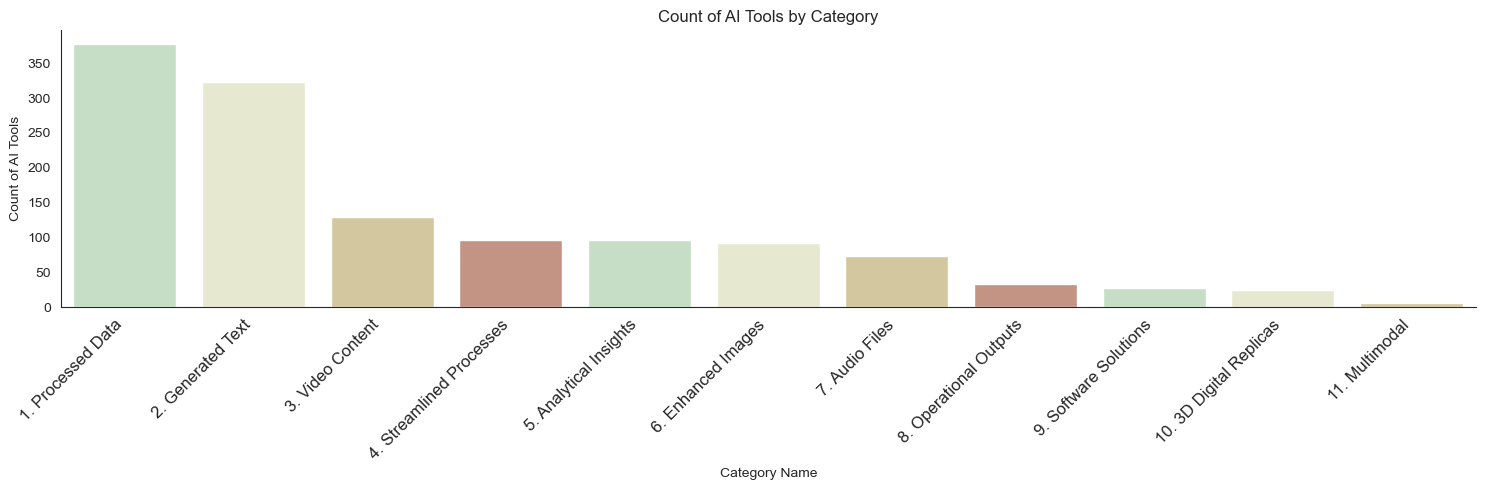

In [34]:
# Define a custom pastel palette
custom_palette = ['#C3E2C2', '#EAECCC', '#DBCC95', '#CD8D7A']



# Make sure the palette has enough colors for all categories
# If there are more categories than colors, the colors will repeat

# Creating the bar plot with the custom palette
plt.figure(figsize=(15, 5))
sns.barplot(data=category_counts, x='category_name', y='count', palette=custom_palette)

plt.title('Count of AI Tools by Category')
plt.ylabel('Count of AI Tools')
plt.xlabel('Category Name')
# Give each category a number and set the x-axis labels with increased font size
category_labels = [f'{i+1}. {cat}' for i, cat in enumerate(category_counts['category_name'])]
plt.xticks(ticks=range(len(category_labels)), labels=category_labels, rotation=45, ha='right', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [31]:
# Converteer 'tool_id' en 'category_id' naar int64 (let op: dit kan fouten veroorzaken als de waarden te groot zijn of decimale delen bevatten)
merged_df['tool_id'] = merged_df['tool_id'].fillna(0).astype('int64')
merged_df['category_id'] = merged_df['category_id'].fillna(0).astype('int64')

In [33]:
#save to csv
merged_df.to_csv('/Users/macbook/thesis/new/code/data/processed_data/category_db.csv', index=False)


In [25]:
feature_data.columns

Index(['tool_id', 'collaboration_sent', 'innovative_sent', 'information_sent',
       'service_sent', 'business_development_sent', 'content_management_sent',
       'user_experience_sent', 'design_sent', 'time_management_sent',
       'product_sent', 'content_creation_sent', 'customer_support_sent',
       'ease_of_use_sent', 'workflow_optimization_sent', 'ai_assistant_sent',
       'collaboration', 'innovative', 'information', 'service',
       'business_development', 'content_management', 'user_experience',
       'design', 'time_management', 'product', 'content_creation',
       'customer_support', 'ease_of_use', 'workflow_optimization',
       'ai_assistant'],
      dtype='object')

In [34]:
#read final
final = read_data('/Users/macbook/thesis/new/code/data/processed_data/final.csv')

/var/folders/lz/910twyk903nb6sxfgz54bngc0000gn/T/ipykernel_40513/3328355624.py:4: DtypeWarning: Columns (13,18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


In [35]:
final.columns

Index(['tool_id', 'url_format', 'unknown', 'jan', 'feb', 'mar', 'apr', 'may',
       'jun', 'jul', 'aug', 'sep', 'average visits',
       'last month with visitors', 'name', 'task', 'url', 'price', 'saves',
       'likes', 'stars', 'period', 'url_content', 'name_format',
       'organization_name', 'organization_name_url', 'industries',
       'headquarters_location', 'description', 'cb_rank_(company)',
       'headquarters_regions', 'founded_date', 'founded_date_precision',
       'operating_status', 'company_type', 'website', 'linkedin',
       'full_description', 'industry_groups', 'number_of_employees',
       'number_of_founders', 'number_of_funding_rounds', 'last_funding_date',
       'last_funding_amount', 'last_funding_amount_currency',
       'last_funding_amount_currency_(in_usd)', 'total_funding_amount',
       'total_funding_amount_currency',
       'total_funding_amount_currency_(in_usd)', 'number_of_investors',
       'number_of_acquisitions', 'ipo_status', 'ipo_date', 's

# Db file

In [51]:
#read csv op
op = read_data('/Users/macbook/thesis/new/code/data/processed_data/op.csv')

/var/folders/lz/910twyk903nb6sxfgz54bngc0000gn/T/ipykernel_42281/3328355624.py:4: DtypeWarning: Columns (14,22) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


In [59]:
import numpy as np
dtypes_array = np.array(op.dtypes)
column_names = np.array(op.columns)
for name, dtype in zip(column_names, dtypes_array):
    print(f"Column: {name}, Data Type: {dtype}")


Column: Unnamed: 0, Data Type: int64
Column: tool_id, Data Type: int64
Column: url_format, Data Type: object
Column: unknown, Data Type: float64
Column: jan, Data Type: float64
Column: feb, Data Type: float64
Column: mar, Data Type: float64
Column: apr, Data Type: float64
Column: may, Data Type: float64
Column: jun, Data Type: float64
Column: jul, Data Type: float64
Column: aug, Data Type: float64
Column: sep, Data Type: float64
Column: average visits, Data Type: float64
Column: last month with visitors, Data Type: object
Column: name, Data Type: object
Column: task, Data Type: object
Column: url, Data Type: object
Column: price, Data Type: object
Column: saves, Data Type: float64
Column: likes, Data Type: float64
Column: stars, Data Type: float64
Column: period, Data Type: object
Column: url_content, Data Type: object
Column: name_format, Data Type: object
Column: organization_name, Data Type: object
Column: organization_name_url, Data Type: object
Column: industries, Data Type: objec

In [53]:
#give unique task an id
op['task_id'] = op['task'].astype('category').cat.codes

#save op to csv
op.to_csv('/Users/macbook/thesis/new/code/data/processed_data/op.csv', index=False)


In [50]:
op.head()

,Unnamed: 0,tool_id,url_format,unknown,jan,feb,mar,apr,may,jun,...,product description,business unit,vertical,application type,use case,type of output modality,type of data origin,freemium,fuzzy_match_score,task_id
0,0,8867,000webhostapp.com,0.0,2.573511e+06,2.434169e+06,3.103368e+06,2.628612e+06,2.951071e+06,3.088798e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,1,5058,0xai.quest,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,994
2,2,1471,123colorize.com,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,982
3,3,3328,123rf.com,0.0,1.363801e+07,1.299907e+07,1.592509e+07,1.557085e+07,1.735900e+07,1.644929e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,994
4,4,7978,1case.io,0.0,1.457023e+03,0.000000e+00,5.130863e+02,1.728357e+04,2.372808e+03,4.973508e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1404


In [43]:
# Melt the columns into one column
merged_df = op.melt(value_vars=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep'], var_name='month', value_name='value')

# Sort the dataframe by month
merged_df = merged_df.sort_values('month')
merged_df['tool_id'] = op['tool_id']

# Reset the index
merged_df = merged_df.reset_index(drop=True)


In [49]:
merged_df.sample(13)

,month,value,tool_id
13227,aug,NaN,NaN
38547,jan,0.000000,2679.0
49304,jul,39204.853974,NaN
51776,jul,13210.707867,NaN
14435,aug,NaN,NaN
54219,jun,178195.512024,NaN
58755,jun,26494.111427,NaN
43486,jul,NaN,NaN
42035,jan,30692.354193,7860.0
84634,sep,NaN,NaN


In [39]:
op.head()

,Unnamed: 0,tool_id,url_format,unknown,jan,feb,mar,apr,may,jun,...,product description,business unit,vertical,application type,use case,type of output modality,type of data origin,freemium,fuzzy_match_score,task_id
0,0,8867,000webhostapp.com,0.0,2.573511e+06,2.434169e+06,3.103368e+06,2.628612e+06,2.951071e+06,3.088798e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,1,5058,0xai.quest,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,994
2,2,1471,123colorize.com,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,982
3,3,3328,123rf.com,0.0,1.363801e+07,1.299907e+07,1.592509e+07,1.557085e+07,1.735900e+07,1.644929e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,994
4,4,7978,1case.io,0.0,1.457023e+03,0.000000e+00,5.130863e+02,1.728357e+04,2.372808e+03,4.973508e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1404
